In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, make_scorer
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [2]:
mh_df = pd.read_csv("Data Carrard et al. 2022 MedTeach.csv")

In [3]:
mh_df

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1781,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,41,39,23,4,34
882,1785,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,26,41,17,5,24
883,1787,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,14,45,15,8,31
884,1789,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,33,58,22,15,19


In [4]:
mh_df["mbi_cy"].min()

4

In [5]:
# List of tuples with the information and definitions
data = [
    ("age", "Age of the participant. (Integer)"),
    ("year", "Year of study of the participant. (Integer)"),
    ("sex", "Gender of the participant. (String)"),
    ("glang", "Language spoken by the participant. (String)"),
    ("job", "Whether or not the participant has employment (Boolean)"),
    ("stud_h", "Hours of study per week of the participant. (Integer)"),
    ("health", "Self-reported health status of the participant. (String)"),
    ("psyt", "Whether or not the participant has sought the help of a psychologist or psychoterapist before (Boolean)"),
    ("jspe", "Job satisfaction score of the participant. (Integer)"),
    ("qcae_cog", "Cognitive empathy score of the participant. (Integer)"),
    ("qcae_aff", "Affective empathy score of the participant. (Integer)"),
    ("amsp", "Academic motivation score of the participant. (Integer)"),
    ("erec_mean", "Empathy rating score mean of the participant. (Integer)"),
    ("cesd", "Center for Epidemiologic Studies Depression scale of the participant. (Integer)"),
    ("stai_t", "State-Trait Anxiety Inventory scale of the participant. (Integer)"),
    ("mbi_ex", "Maslach Burnout Inventory-Exhaustion scale of the participant. (Integer)"),
    ("mbi_cy", "Maslach Burnout Inventory - Cynicism Scale of the participant. (Integer)"),
    ("mbi_ea", "Maslach Burnout Inventory - Professional Efficacy Scale of the participant. (Integer)")
]

df = pd.DataFrame(data, columns=["Variable", "Definition"])
pd.set_option("display.max_colwidth", None)
df

,Variable,Definition
0,age,Age of the participant. (Integer)
1,year,Year of study of the participant. (Integer)
2,sex,Gender of the participant. (String)
3,glang,Language spoken by the participant. (String)
4,job,Whether or not the participant has employment (Boolean)
5,stud_h,Hours of study per week of the participant. (Integer)
6,health,Self-reported health status of the participant. (String)
7,psyt,Whether or not the participant has sought the help of a psychologist or psychoterapist before (Boolean)
8,jspe,Job satisfaction score of the participant. (Integer)
9,qcae_cog,Cognitive empathy score of the participant. (Integer)


In [6]:
lang_dict = {1: 'French', 15: 'German', 20: 'English', 37: 'Arab', 51: 'Basque', 
             52: 'Bulgarian', 53: 'Catalan', 54: 'Chinese', 59: 'Korean', 
             60: 'Croatian', 62: 'Danish', 63: 'Spanish', 82: 'Estonian', 
             83: 'Finnish', 84: 'Galician', 85: 'Greek', 86: 'Hebrew', 
             87: 'Hindi', 88: 'Hungarian', 89: 'Indonesian', 90: 'Italian', 
             92: 'Japanese', 93: 'Kazakh', 94: 'Latvian', 95: 'Lithuanian', 
             96: 'Malay', 98: 'Dutch', 100: 'Norwegian', 101: 'Polish', 
             102: 'Portuguese', 104: 'Romanian', 106: 'Russian', 108: 'Serbian', 
             112: 'Slovak', 113: 'Slovenian', 114: 'Swedish', 116: 'Czech', 
             117: 'Thai', 118: 'Turkish', 119: 'Ukrainian', 120: 'Vietnamese', 
             121: 'Other'}
gend_dict = {1: 'Man', 2:'Woman', 3:'Non-binary'}

mh_df['glang'] = mh_df['glang'].map(lang_dict)
mh_df['sex'] = mh_df['sex'].map(gend_dict)

In [7]:
mh_df

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,Man,Vietnamese,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,Man,French,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,Woman,French,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,Woman,French,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,Man,French,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1781,21,2,Man,French,1,0,45,3,0,106,63,39,28,0.619048,41,39,23,4,34
882,1785,20,2,Woman,French,0,0,13,3,0,113,67,40,21,0.809524,26,41,17,5,24
883,1787,19,1,Man,French,0,0,50,5,0,100,50,31,24,0.547619,14,45,15,8,31
884,1789,24,5,Woman,French,0,0,20,2,1,120,64,39,21,0.785714,33,58,22,15,19


In [8]:
mh_df.describe()

,id,age,year,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,889.709932,22.383747,3.102709,0.563205,0.348758,25.288939,3.777652,0.224605,106.374718,58.525959,34.784424,23.150113,0.720144,18.050790,42.898420,16.878104,10.079007,24.207675
std,515.555875,3.300664,1.763937,0.496269,0.476847,15.927875,1.061497,0.417558,8.784012,6.570341,5.377062,4.993220,0.093570,11.478731,11.978458,5.256025,4.592609,4.633675
min,2.000000,17.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,67.000000,37.000000,18.000000,6.000000,0.357143,0.000000,20.000000,5.000000,4.000000,10.000000
25%,447.500000,20.000000,1.000000,0.000000,0.000000,12.000000,3.000000,0.000000,101.000000,54.000000,31.000000,20.000000,0.666667,9.000000,34.000000,13.000000,6.000000,21.000000
50%,876.000000,22.000000,3.000000,1.000000,0.000000,25.000000,4.000000,0.000000,107.000000,58.000000,35.000000,23.000000,0.726190,16.000000,43.000000,17.000000,9.000000,24.000000
75%,1341.750000,24.000000,5.000000,1.000000,1.000000,36.000000,5.000000,0.000000,113.000000,63.000000,39.000000,26.750000,0.785714,25.000000,51.000000,20.000000,13.000000,28.000000
max,1790.000000,49.000000,6.000000,1.000000,1.000000,70.000000,5.000000,1.000000,125.000000,76.000000,48.000000,35.000000,0.952381,56.000000,77.000000,30.000000,24.000000,36.000000


In [9]:
mh_df['foreignlang'] = mh_df['glang'].apply(lambda x: 0 if x == 'French' else 1)

# Convert glang to binary value of foreign language
mh_df.drop(columns=['glang'], inplace=True)
mh_df.rename(columns={'foreignlang': 'foreignlang'}, inplace=True)

In [10]:
mh_df

,id,age,year,sex,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,foreignlang
0,2,18,1,Man,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20,1
1,4,26,4,Man,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26,0
2,9,21,3,Woman,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23,0
3,10,21,2,Woman,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21,0
4,13,21,3,Man,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1781,21,2,Man,1,0,45,3,0,106,63,39,28,0.619048,41,39,23,4,34,0
882,1785,20,2,Woman,0,0,13,3,0,113,67,40,21,0.809524,26,41,17,5,24,0
883,1787,19,1,Man,0,0,50,5,0,100,50,31,24,0.547619,14,45,15,8,31,0
884,1789,24,5,Woman,0,0,20,2,1,120,64,39,21,0.785714,33,58,22,15,19,0


In [11]:
# Define four different dataframes for four different models
ov_mhs_preval_df = mh_df.copy()
empathy_df = mh_df.loc[:, ['id', 'age', 'year', 'sex', 'stud_h', 'foreignlang', 'part', 'job', 'qcae_cog', 'qcae_aff', 'erec_mean']].copy()
mental_health_df = mh_df.loc[:, ['id', 'age', 'year', 'sex', 'stud_h', 'psyt', 'foreignlang', 'part', 'job', 'cesd', 'stai_t', 'health']].copy()
burnout_df = mh_df.loc[:, ['id', 'age', 'year', 'sex', 'stud_h', 'foreignlang', 'part', 'job', 'amsp', 'mbi_ex', 'mbi_cy', 'mbi_ea']].copy()

In [12]:
def complement(x):
    return 1 - x

# Attribute Averaging and Descriptive Analytics

## Overal Mental Health Symptom Prevalence

In [13]:
# Attribute averaging overall measure
ov_mhs_preval_columns = ['health', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'amsp', 'mbi_ex', 'mbi_cy', 'mbi_ea']

#X = ov_mhs_preval_df[ov_mhs_preval_columns]

scaler = StandardScaler()

mh_ov_scaled = mh_df.copy()
mh_ov_scaled.set_index("id", inplace=True)
mh_ov_scaled[ov_mhs_preval_columns] = scaler.fit_transform(mh_ov_scaled[ov_mhs_preval_columns])
mh_ov_scaled["health"] = mh_ov_scaled["health"].apply(complement)
mh_ov_scaled["jspe"] = mh_ov_scaled["jspe"].apply(complement)
mh_ov_scaled["qcae_cog"] = mh_ov_scaled["qcae_cog"].apply(complement)
mh_ov_scaled["qcae_aff"] = mh_ov_scaled["qcae_aff"].apply(complement)
mh_ov_scaled["amsp"] = mh_ov_scaled["amsp"].apply(complement)
mh_ov_scaled["erec_mean"] = mh_ov_scaled["erec_mean"].apply(complement)
mh_ov_scaled["mbi_ea"] = mh_ov_scaled["mbi_ea"].apply(complement)

mh_ov_scaled['ov_mhs_preval'] = mh_ov_scaled[ov_mhs_preval_columns].mean(axis=1)
mh_ov_unscaled = mh_df.drop(columns=['health', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'amsp', 'mbi_ex', 'mbi_cy', 'mbi_ea'])
mh_ov_unscaled.set_index("id", inplace=True)
mh_ov_unscaled['ov_mhs_preval'] = mh_ov_scaled[ov_mhs_preval_columns].mean(axis=1)
mh_ov_scaled.drop(columns=['health', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'amsp', 'mbi_ex', 'mbi_cy', 'mbi_ea'], inplace=True)
display(mh_ov_scaled.head(5))
print("Data Summary:")
display(mh_ov_scaled.describe())
print("Correlation Matrix:")
display(mh_ov_scaled.corr())

print("Number of students with an ov_mhs_preval greater than 50: ")
print((mh_ov_scaled['ov_mhs_preval'] > 0.50).sum())
print("Number of students with an ov_mhs_preval smaller than 50: ")
print((mh_ov_scaled['ov_mhs_preval'] < 0.50).sum())

,age,year,sex,part,job,stud_h,psyt,foreignlang,ov_mhs_preval
id,,,,,,,,,
2,18,1,Man,1,0,56,0,1,1.477853
4,26,4,Man,1,0,20,0,0,0.421765
9,21,3,Woman,0,0,36,0,0,1.070286
10,21,2,Woman,0,1,51,0,0,0.768214
13,21,3,Man,1,0,22,0,0,1.034127


Data Summary:


,age,year,part,job,stud_h,psyt,foreignlang,ov_mhs_preval
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,22.383747,3.102709,0.563205,0.348758,25.288939,0.224605,0.190745,0.636364
std,3.300664,1.763937,0.496269,0.476847,15.927875,0.417558,0.393110,0.474513
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.900829
25%,20.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.315873
50%,22.000000,3.000000,1.000000,0.000000,25.000000,0.000000,0.000000,0.617364
75%,24.000000,5.000000,1.000000,1.000000,36.000000,0.000000,0.000000,0.943966
max,49.000000,6.000000,1.000000,1.000000,70.000000,1.000000,1.000000,2.199594


Correlation Matrix:


,age,year,part,job,stud_h,psyt,foreignlang,ov_mhs_preval
age,1.000000,0.592530,0.187294,0.226448,-0.293557,0.015278,0.093308,-0.129994
year,0.592530,1.000000,0.146825,0.216636,-0.521473,0.000861,-0.049469,-0.221035
part,0.187294,0.146825,1.000000,0.047603,-0.103950,0.026840,-0.070556,-0.114730
job,0.226448,0.216636,0.047603,1.000000,-0.202371,0.060138,-0.005667,-0.054231
stud_h,-0.293557,-0.521473,-0.103950,-0.202371,1.000000,-0.033045,0.065719,0.123455
psyt,0.015278,0.000861,0.026840,0.060138,-0.033045,1.000000,-0.041015,0.198471
foreignlang,0.093308,-0.049469,-0.070556,-0.005667,0.065719,-0.041015,1.000000,0.095485
ov_mhs_preval,-0.129994,-0.221035,-0.114730,-0.054231,0.123455,0.198471,0.095485,1.000000


Number of students with an ov_mhs_preval greater than 50: 
542
Number of students with an ov_mhs_preval smaller than 50: 
344


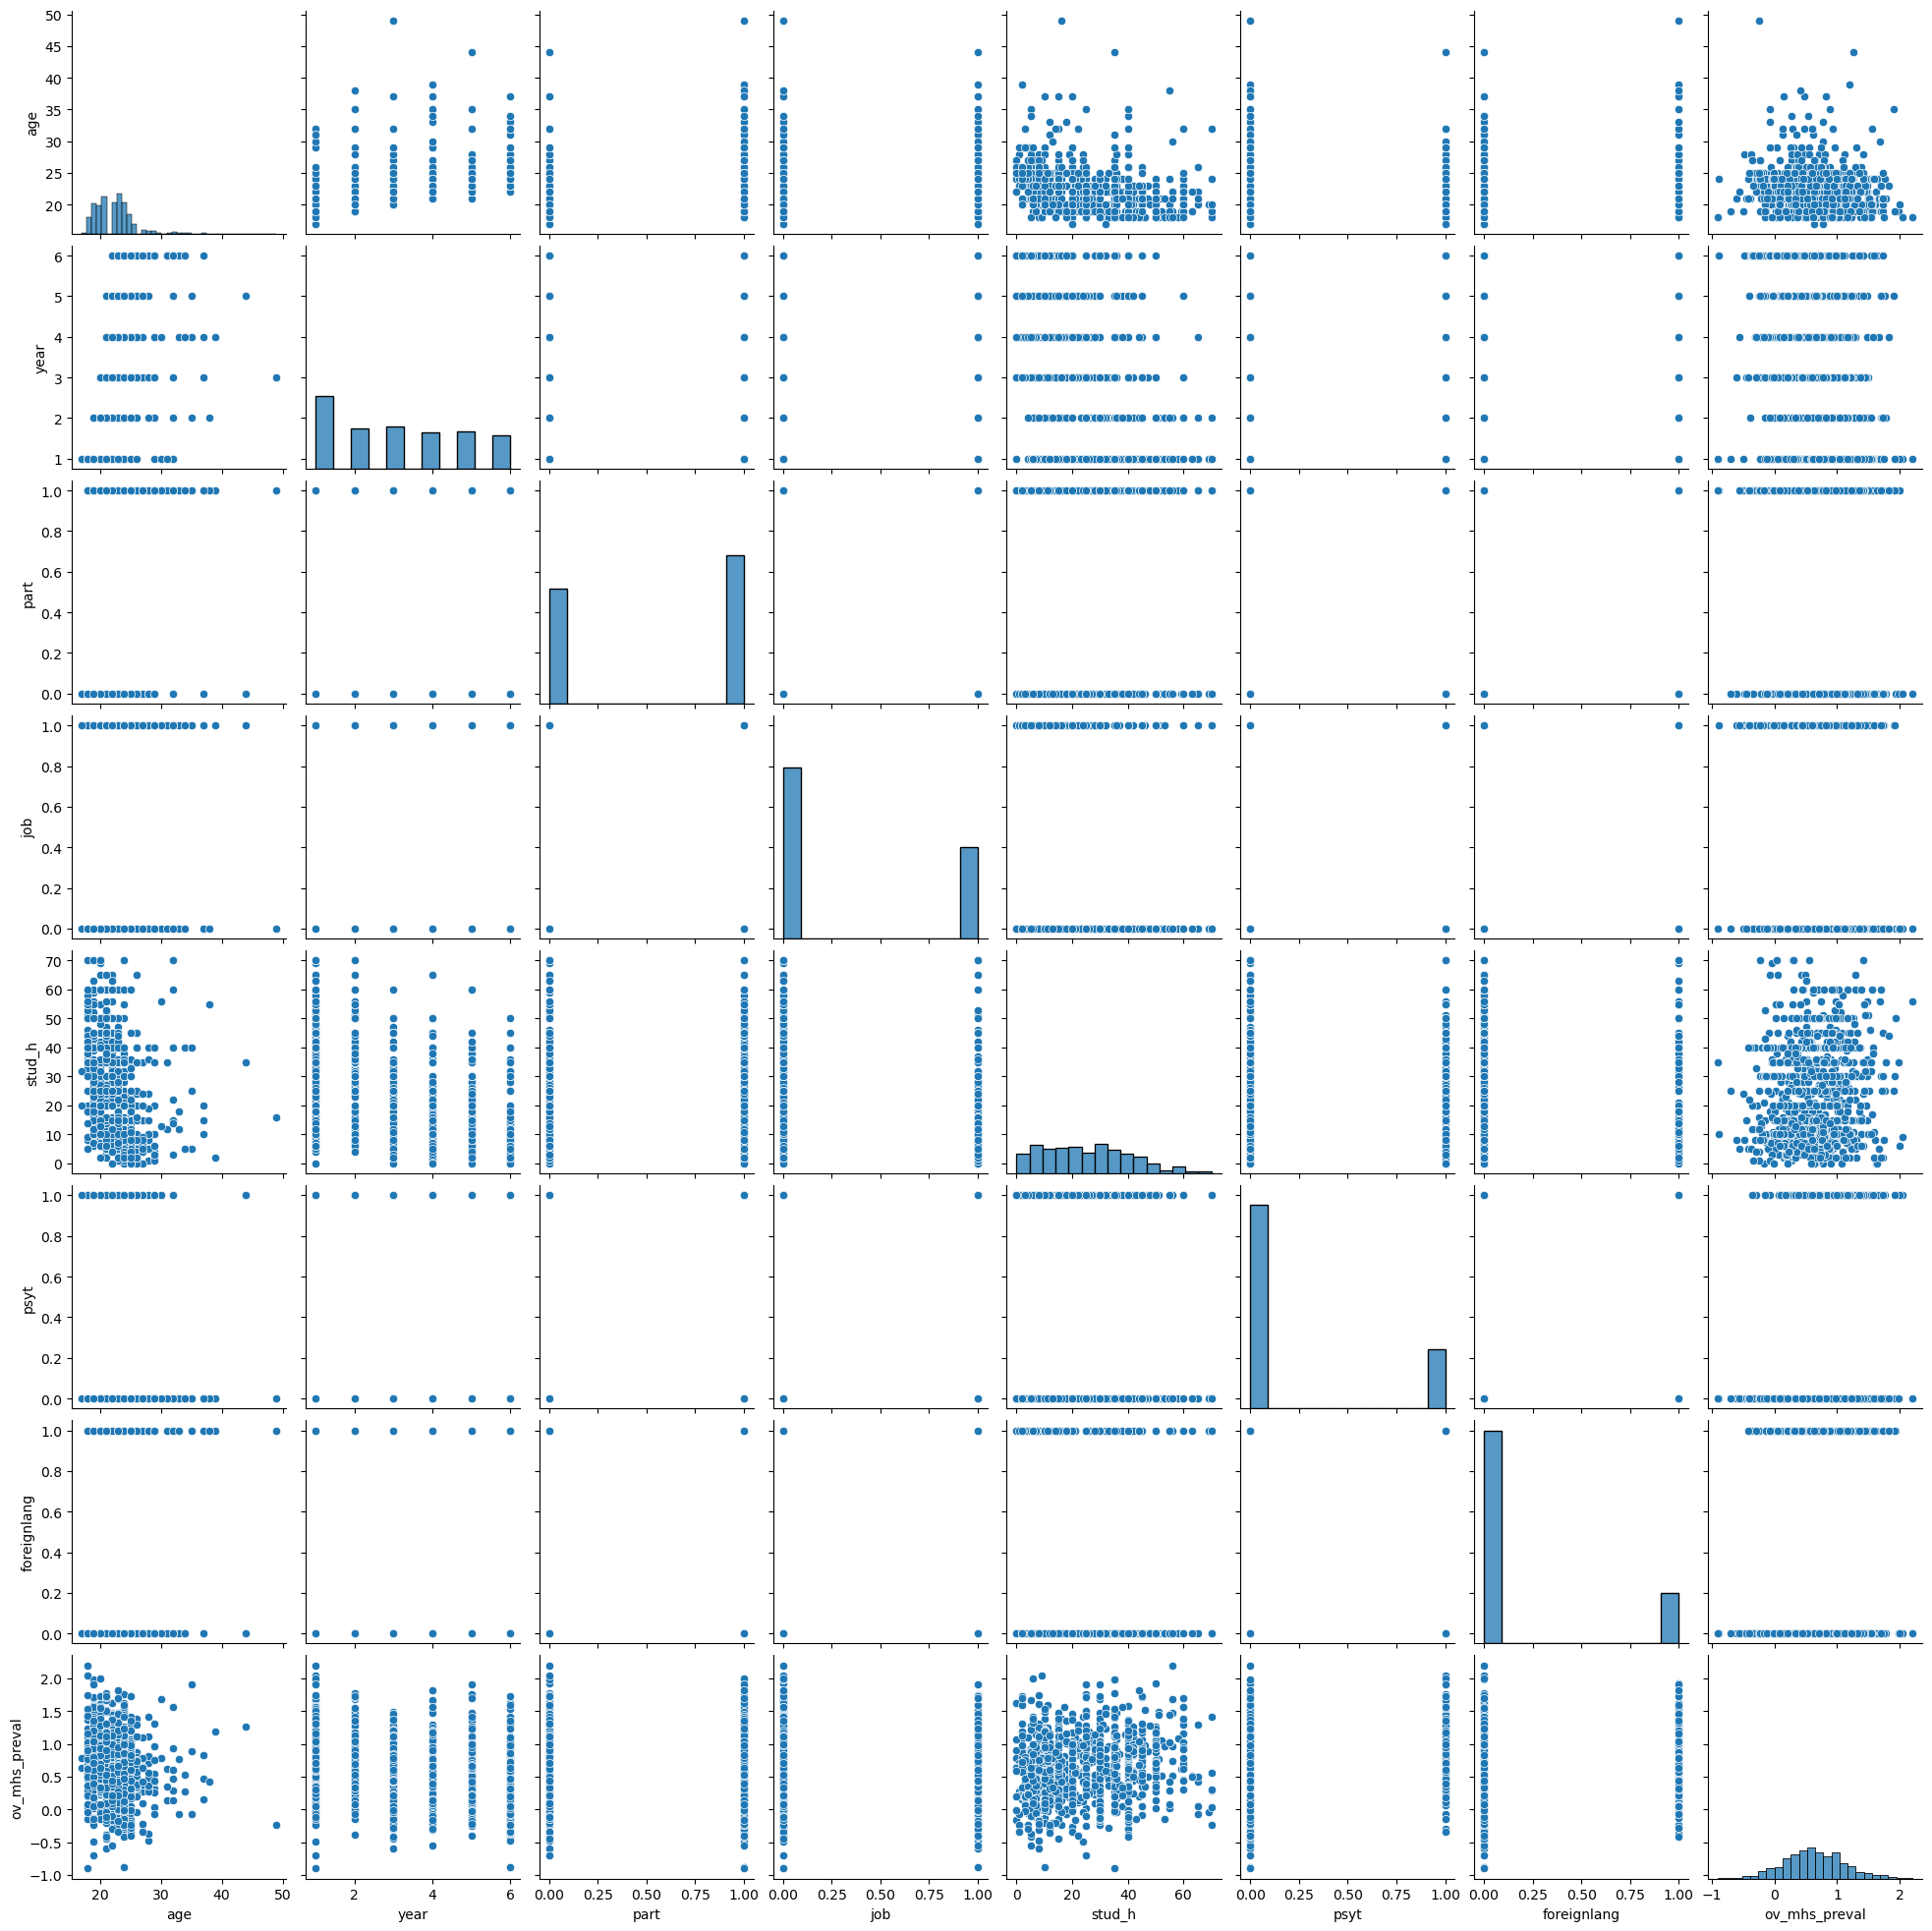

In [14]:
sns.pairplot(mh_ov_scaled)
plt.show()

## Empathy Indicator

In [15]:
empathy_columns = ['qcae_cog', 'qcae_aff', 'erec_mean']

scaler = MinMaxScaler()
empathy_scaled = empathy_df.copy()
empathy_scaled.set_index("id", inplace=True)
empathy_scaled[empathy_columns] = scaler.fit_transform(empathy_df[empathy_columns])

empathy_scaled['emp_ind'] = empathy_scaled[empathy_columns].mean(axis=1)

empathy_unscaled = empathy_df.drop(columns=['qcae_cog', 'qcae_aff', 'erec_mean'])
empathy_unscaled.set_index("id", inplace=True)
empathy_unscaled['emp_ind'] = empathy_scaled[empathy_columns].mean(axis=1)

empathy_scaled.drop(columns=['qcae_cog', 'qcae_aff', 'erec_mean'], inplace=True)

display(empathy_scaled.head(5))
print("Data Summary:")
display(empathy_scaled.describe())
print("Correlation Matrix:")
display(empathy_scaled.corr())

,age,year,sex,stud_h,foreignlang,part,job,emp_ind
id,,,,,,,,
2,18,1,Man,56,1,1,0,0.527009
4,26,4,Man,20,0,1,0,0.551624
9,21,3,Woman,36,0,0,0,0.650769
10,21,2,Woman,51,0,0,1,0.561538
13,21,3,Man,22,0,1,0,0.477265


Data Summary:


,age,year,stud_h,foreignlang,part,job,emp_ind
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,22.383747,3.102709,25.288939,0.190745,0.563205,0.348758,0.573757
std,3.300664,1.763937,15.927875,0.393110,0.496269,0.476847,0.111909
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.277094
25%,20.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.500085
50%,22.000000,3.000000,25.000000,0.000000,1.000000,0.000000,0.570513
75%,24.000000,5.000000,36.000000,0.000000,1.000000,1.000000,0.652137
max,49.000000,6.000000,70.000000,1.000000,1.000000,1.000000,0.889573


Correlation Matrix:


,age,year,stud_h,foreignlang,part,job,emp_ind
age,1.000000,0.592530,-0.293557,0.093308,0.187294,0.226448,0.016689
year,0.592530,1.000000,-0.521473,-0.049469,0.146825,0.216636,0.108775
stud_h,-0.293557,-0.521473,1.000000,0.065719,-0.103950,-0.202371,-0.055071
foreignlang,0.093308,-0.049469,0.065719,1.000000,-0.070556,-0.005667,-0.120384
part,0.187294,0.146825,-0.103950,-0.070556,1.000000,0.047603,0.039762
job,0.226448,0.216636,-0.202371,-0.005667,0.047603,1.000000,0.019352
emp_ind,0.016689,0.108775,-0.055071,-0.120384,0.039762,0.019352,1.000000


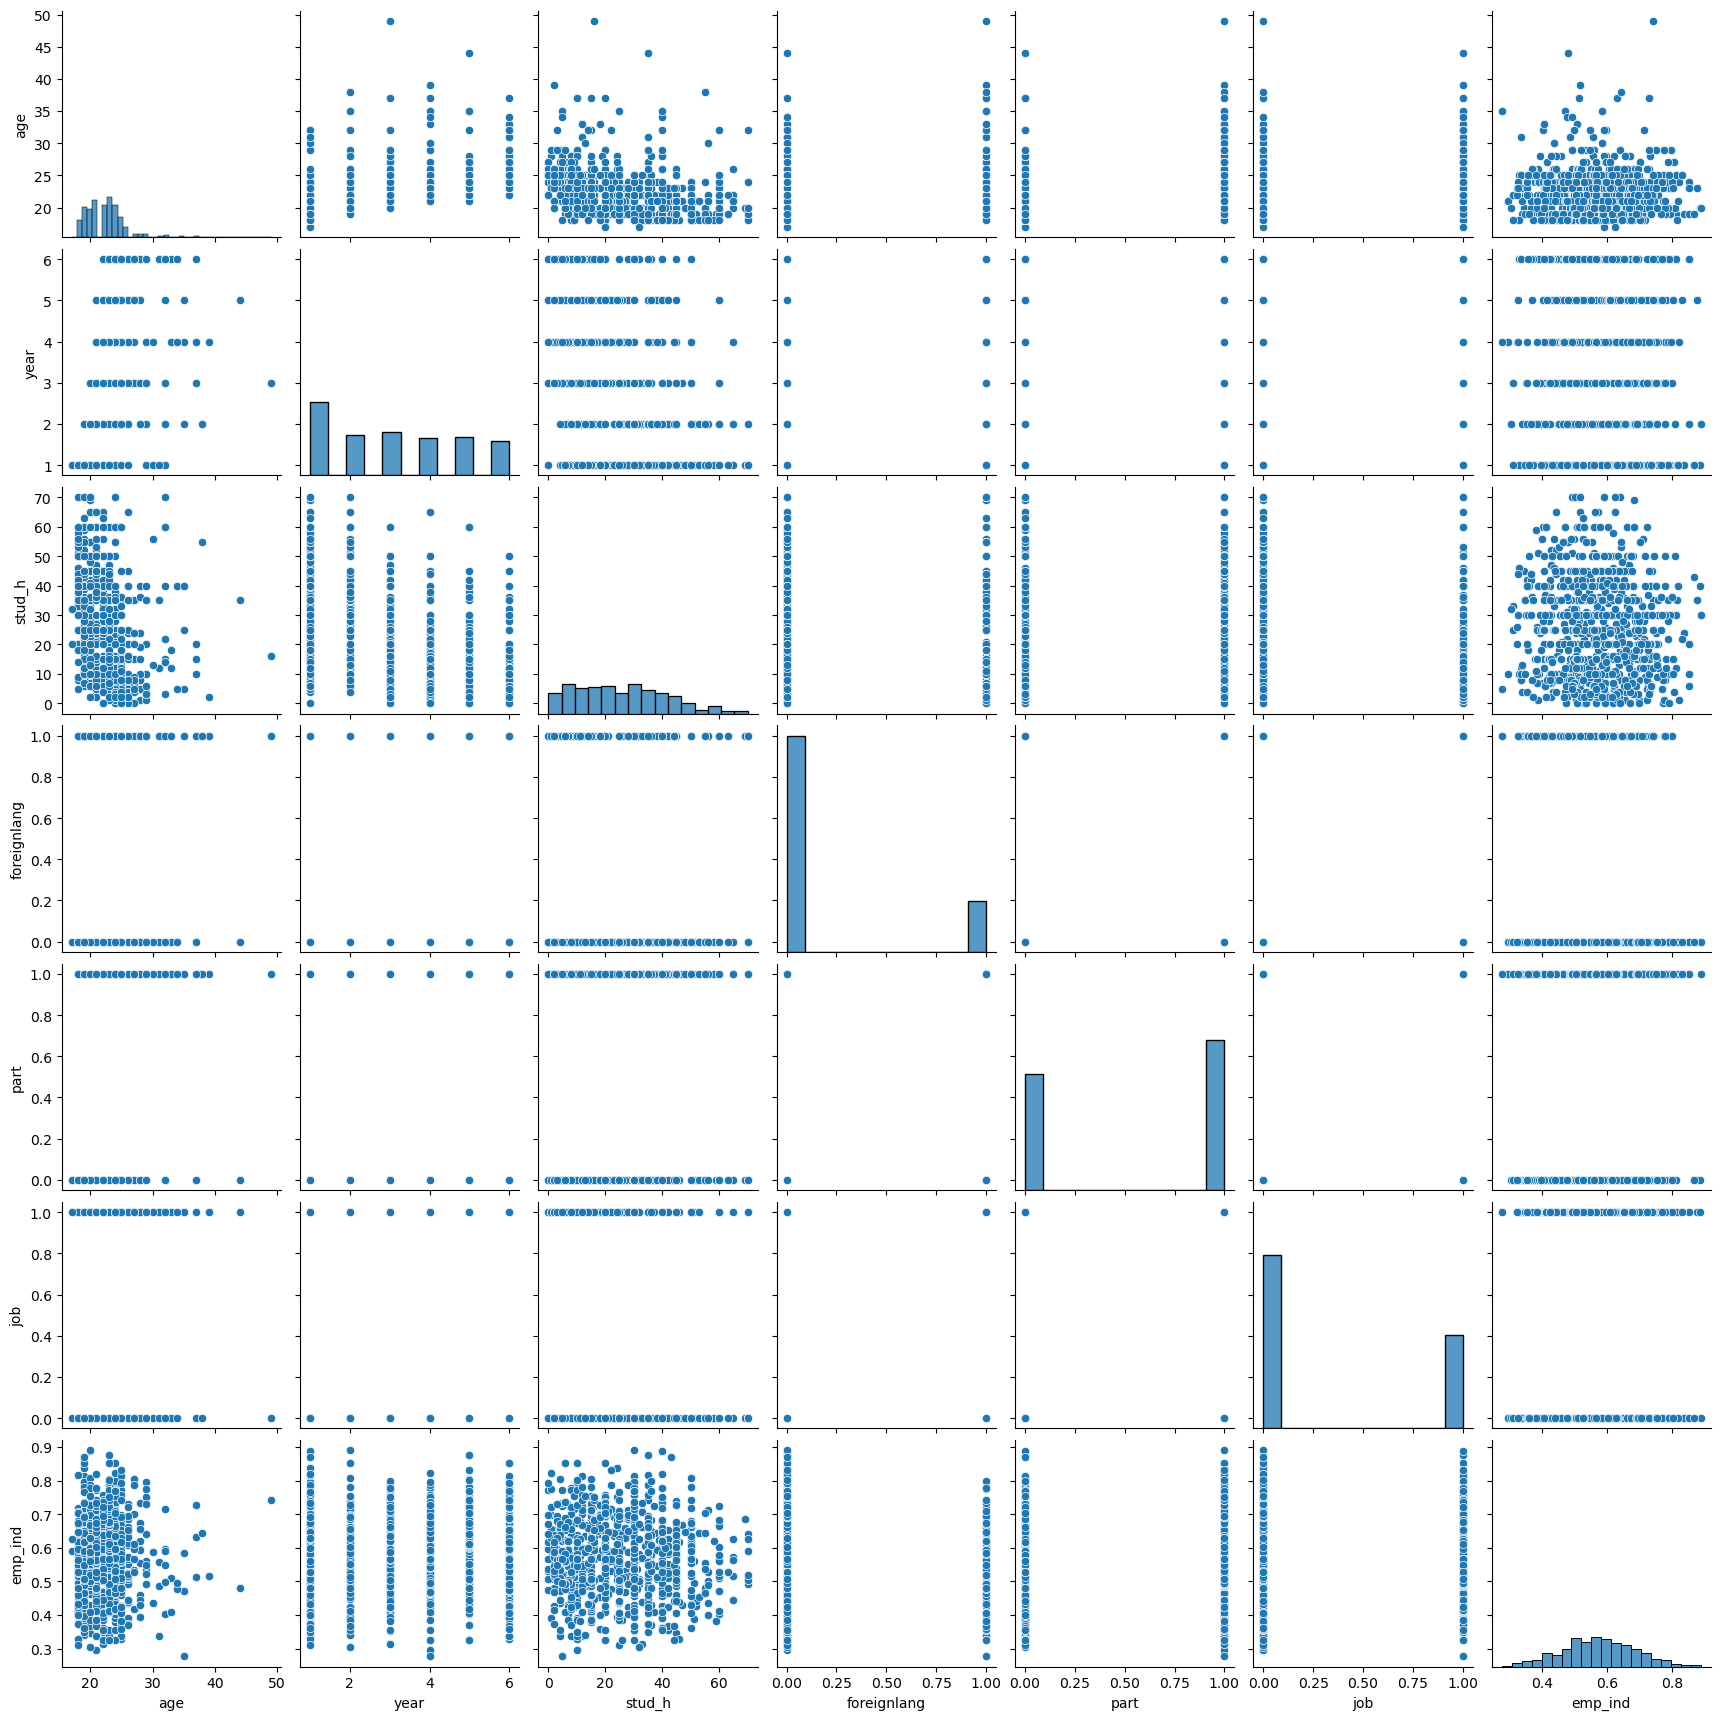

In [16]:
sns.pairplot(empathy_scaled)
plt.show()

## Mental Health Distress Indicator

In [17]:
# PCA reducion mental health
mental_health_columns = ['cesd', 'stai_t']

scaler = MinMaxScaler()
mental_health_scaled = mental_health_df.copy()
mental_health_scaled.set_index("id", inplace=True)
mental_health_scaled[mental_health_columns] = scaler.fit_transform(mental_health_scaled[mental_health_columns])

mental_health_scaled["mh_ind"] = mental_health_scaled[mental_health_columns].mean(axis=1)

mental_health_unscaled = mental_health_df.drop(columns=['cesd', 'stai_t'])
mental_health_unscaled.set_index("id", inplace=True)
mental_health_unscaled['mh_ind'] = mental_health_scaled[mental_health_columns].mean(axis=1)

mental_health_scaled.drop(columns=['cesd', 'stai_t'], inplace=True)
display(mental_health_scaled.head(5))
print("Data Summary:")
display(mental_health_scaled.describe())
print("Correlation Matrix:")
display(mental_health_scaled.corr())

,age,year,sex,stud_h,psyt,foreignlang,part,job,health,mh_ind
id,,,,,,,,,,
2,18,1,Man,56,0,1,1,0,3,0.663221
4,26,4,Man,20,0,0,1,0,4,0.176535
9,21,3,Woman,36,0,0,0,0,3,0.688127
10,21,2,Woman,51,0,0,0,1,5,0.397400
13,21,3,Man,22,0,0,1,0,4,0.353070


Data Summary:


,age,year,stud_h,psyt,foreignlang,part,job,health,mh_ind
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,22.383747,3.102709,25.288939,0.224605,0.190745,0.563205,0.348758,3.777652,0.362031
std,3.300664,1.763937,15.927875,0.417558,0.393110,0.496269,0.476847,1.061497,0.192249
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,20.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.219886
50%,22.000000,3.000000,25.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.352522
75%,24.000000,5.000000,36.000000,0.000000,0.000000,1.000000,1.000000,5.000000,0.485902
max,49.000000,6.000000,70.000000,1.000000,1.000000,1.000000,1.000000,5.000000,0.991228


Correlation Matrix:


,age,year,stud_h,psyt,foreignlang,part,job,health,mh_ind
age,1.000000,0.592530,-0.293557,0.015278,0.093308,0.187294,0.226448,-0.029800,-0.118917
year,0.592530,1.000000,-0.521473,0.000861,-0.049469,0.146825,0.216636,0.084023,-0.219033
stud_h,-0.293557,-0.521473,1.000000,-0.033045,0.065719,-0.103950,-0.202371,-0.073520,0.175909
psyt,0.015278,0.000861,-0.033045,1.000000,-0.041015,0.026840,0.060138,-0.137032,0.303427
foreignlang,0.093308,-0.049469,0.065719,-0.041015,1.000000,-0.070556,-0.005667,0.001562,0.072941
part,0.187294,0.146825,-0.103950,0.026840,-0.070556,1.000000,0.047603,0.077115,-0.096120
job,0.226448,0.216636,-0.202371,0.060138,-0.005667,0.047603,1.000000,-0.022981,-0.066330
health,-0.029800,0.084023,-0.073520,-0.137032,0.001562,0.077115,-0.022981,1.000000,-0.357765
mh_ind,-0.118917,-0.219033,0.175909,0.303427,0.072941,-0.096120,-0.066330,-0.357765,1.000000


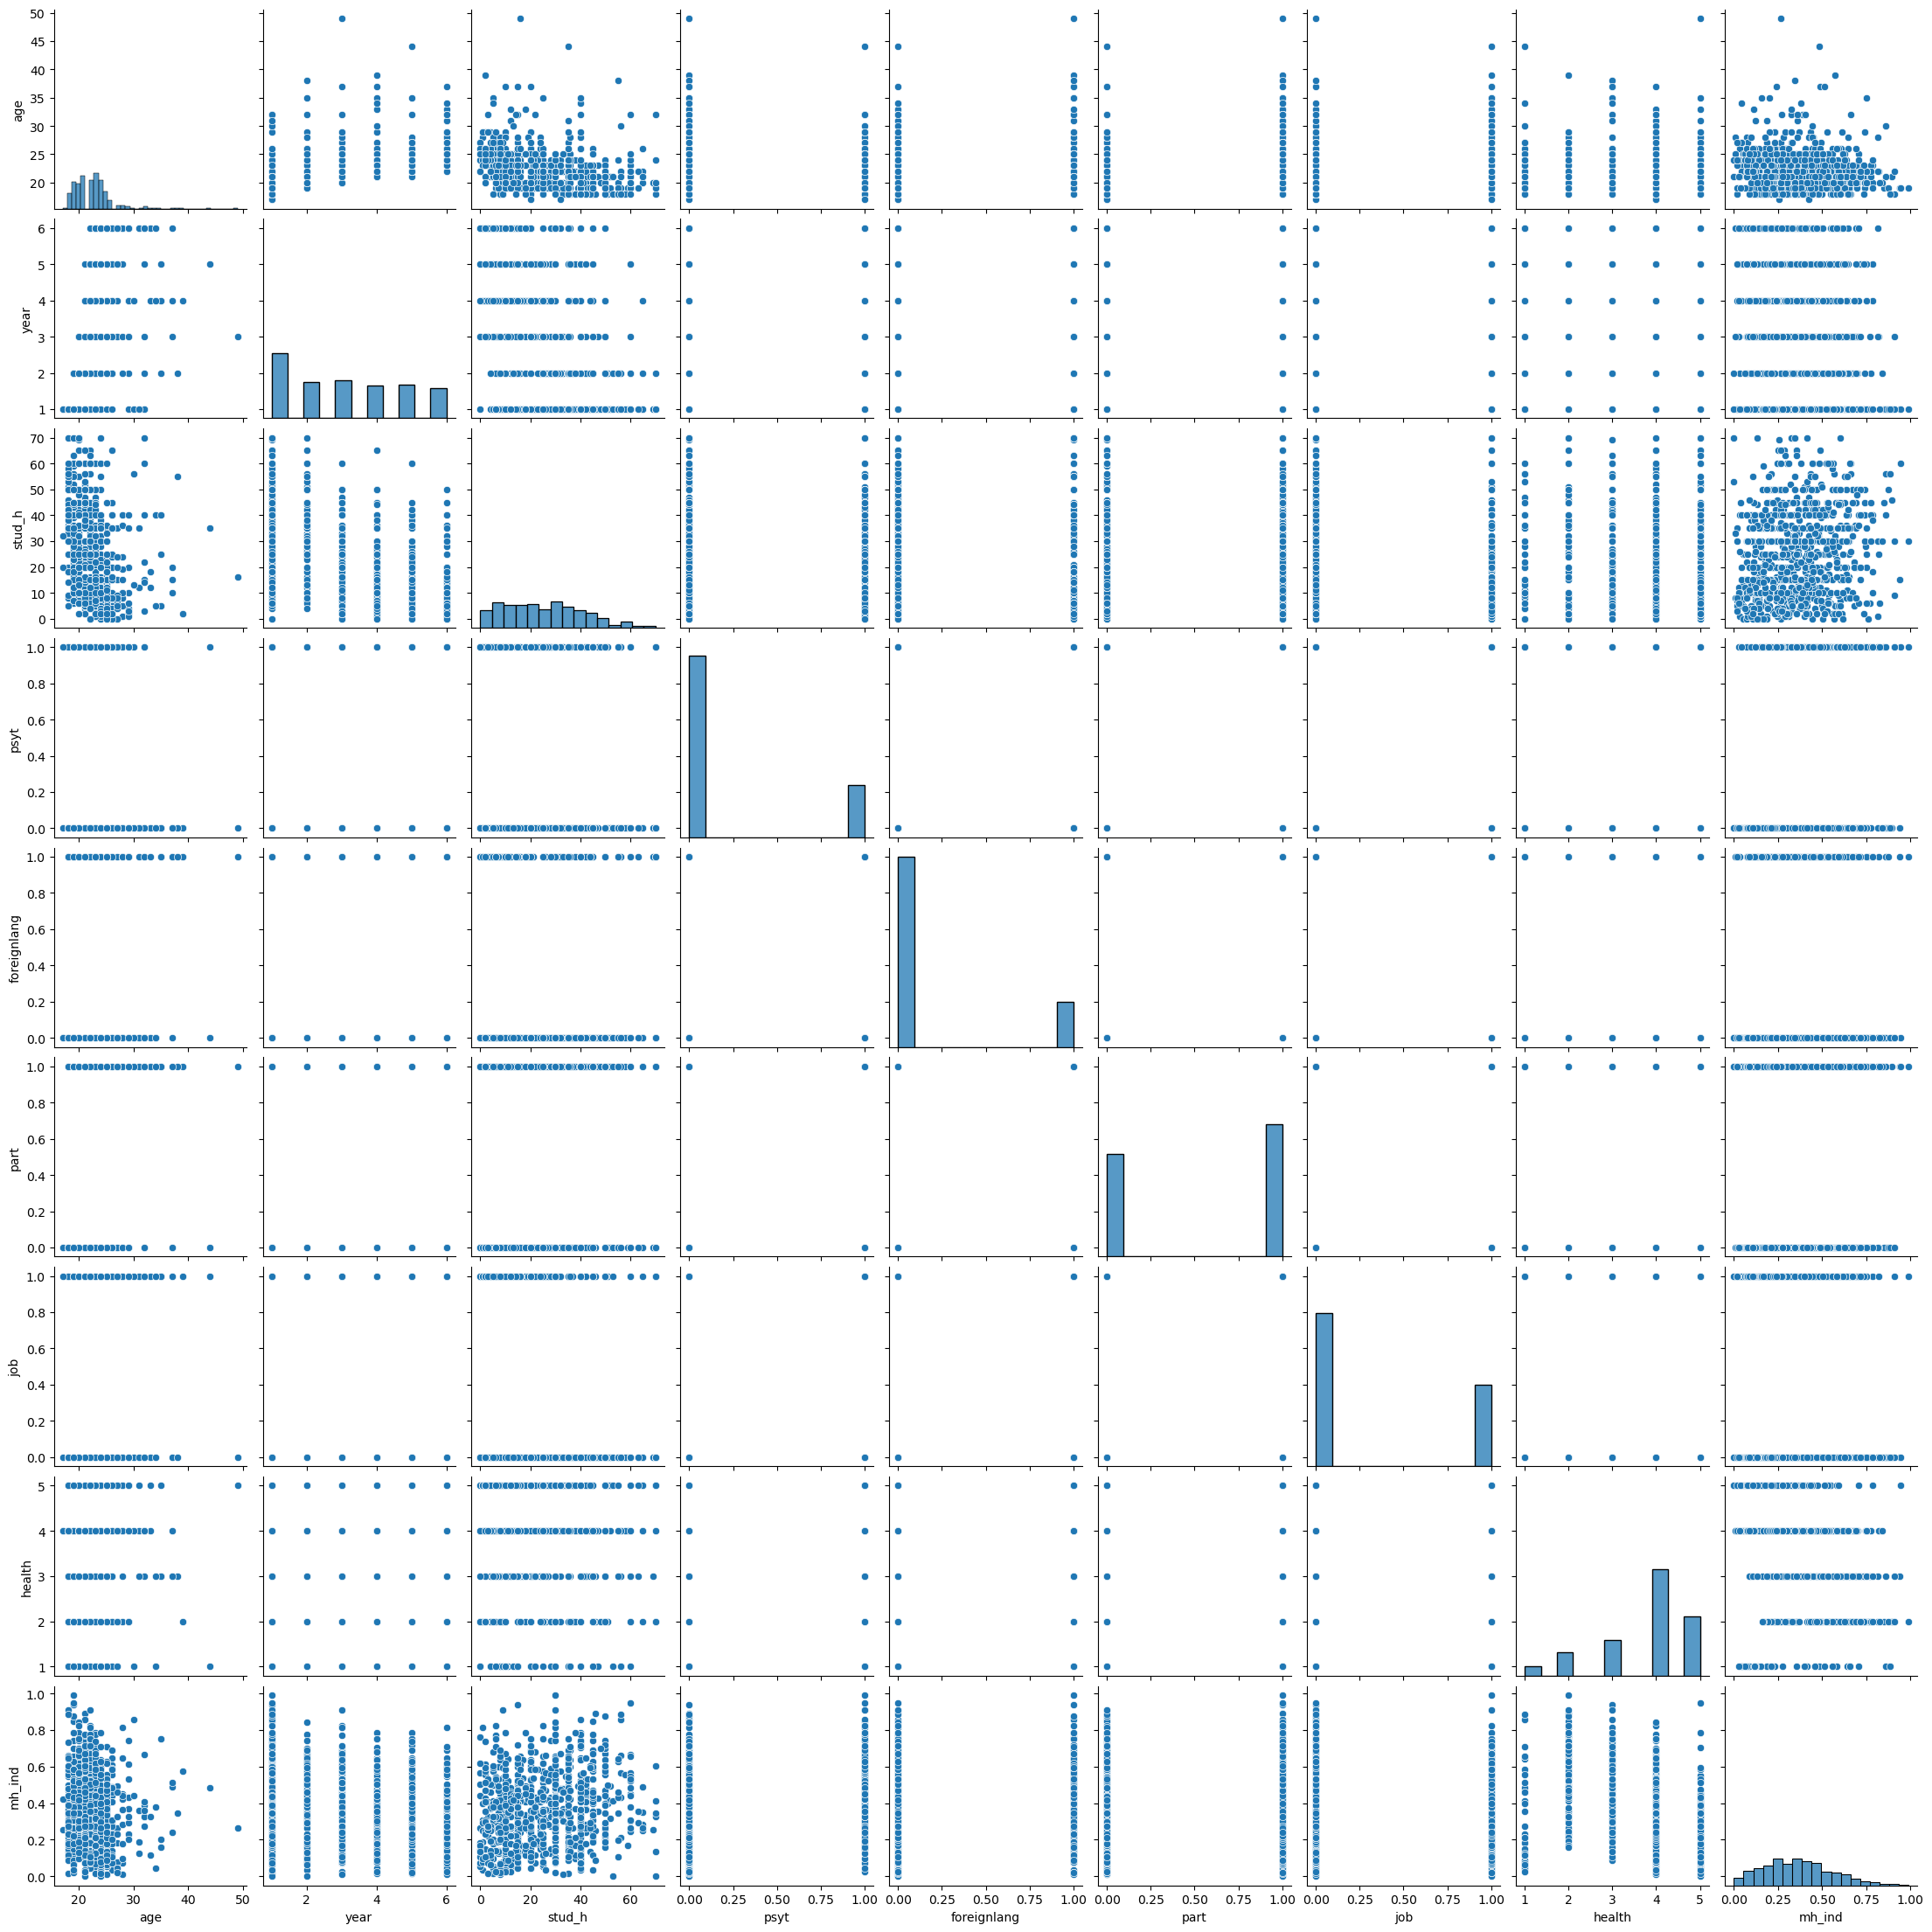

In [18]:
sns.pairplot(mental_health_scaled)
plt.show()

## Burnout Indicator

In [19]:
# PCA reduction burnout
burnout_columns = ['amsp', 'mbi_ex', 'mbi_cy', 'mbi_ea']

scaler = MinMaxScaler()
burnout_scaled = burnout_df.copy()
burnout_scaled.set_index("id", inplace=True)
burnout_scaled[burnout_columns] = scaler.fit_transform(burnout_scaled[burnout_columns])

burnout_scaled["amsp"] = burnout_scaled["amsp"].apply(complement)
burnout_scaled["mbi_ea"] = burnout_scaled["mbi_ea"].apply(complement)

burnout_scaled["burn_ind"] = burnout_scaled[burnout_columns].mean(axis=1)

burnout_unscaled = burnout_df.drop(columns=['amsp', 'mbi_ex', 'mbi_cy', 'mbi_ea'])
burnout_unscaled.set_index("id", inplace=True)
burnout_unscaled['burn_ind'] = burnout_scaled[burnout_columns].mean(axis=1)

burnout_scaled.drop(columns=['amsp', 'mbi_ex', 'mbi_cy', 'mbi_ea'], inplace=True)
display(burnout_scaled.head(5))
print("Data Summary:")
display(burnout_scaled.describe())
print("Correlation Matrix:")
display(burnout_scaled.corr())

,age,year,sex,stud_h,foreignlang,part,job,burn_ind
id,,,,,,,,
2,18,1,Man,56,1,1,0,0.541519
4,26,4,Man,20,0,1,0,0.385723
9,21,3,Woman,36,0,0,0,0.507672
10,21,2,Woman,51,0,0,1,0.475782
13,21,3,Man,22,0,1,0,0.540690


Data Summary:


,age,year,stud_h,foreignlang,part,job,burn_ind
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,22.383747,3.102709,25.288939,0.190745,0.563205,0.348758,0.410311
std,3.300664,1.763937,15.927875,0.393110,0.496269,0.476847,0.139333
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.047851
25%,20.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.313614
50%,22.000000,3.000000,25.000000,0.000000,1.000000,0.000000,0.402407
75%,24.000000,5.000000,36.000000,0.000000,1.000000,1.000000,0.496223
max,49.000000,6.000000,70.000000,1.000000,1.000000,1.000000,0.858919


Correlation Matrix:


,age,year,stud_h,foreignlang,part,job,burn_ind
age,1.000000,0.592530,-0.293557,0.093308,0.187294,0.226448,-0.084594
year,0.592530,1.000000,-0.521473,-0.049469,0.146825,0.216636,-0.052763
stud_h,-0.293557,-0.521473,1.000000,0.065719,-0.103950,-0.202371,0.002044
foreignlang,0.093308,-0.049469,0.065719,1.000000,-0.070556,-0.005667,0.018139
part,0.187294,0.146825,-0.103950,-0.070556,1.000000,0.047603,-0.046579
job,0.226448,0.216636,-0.202371,-0.005667,0.047603,1.000000,-0.023591
burn_ind,-0.084594,-0.052763,0.002044,0.018139,-0.046579,-0.023591,1.000000


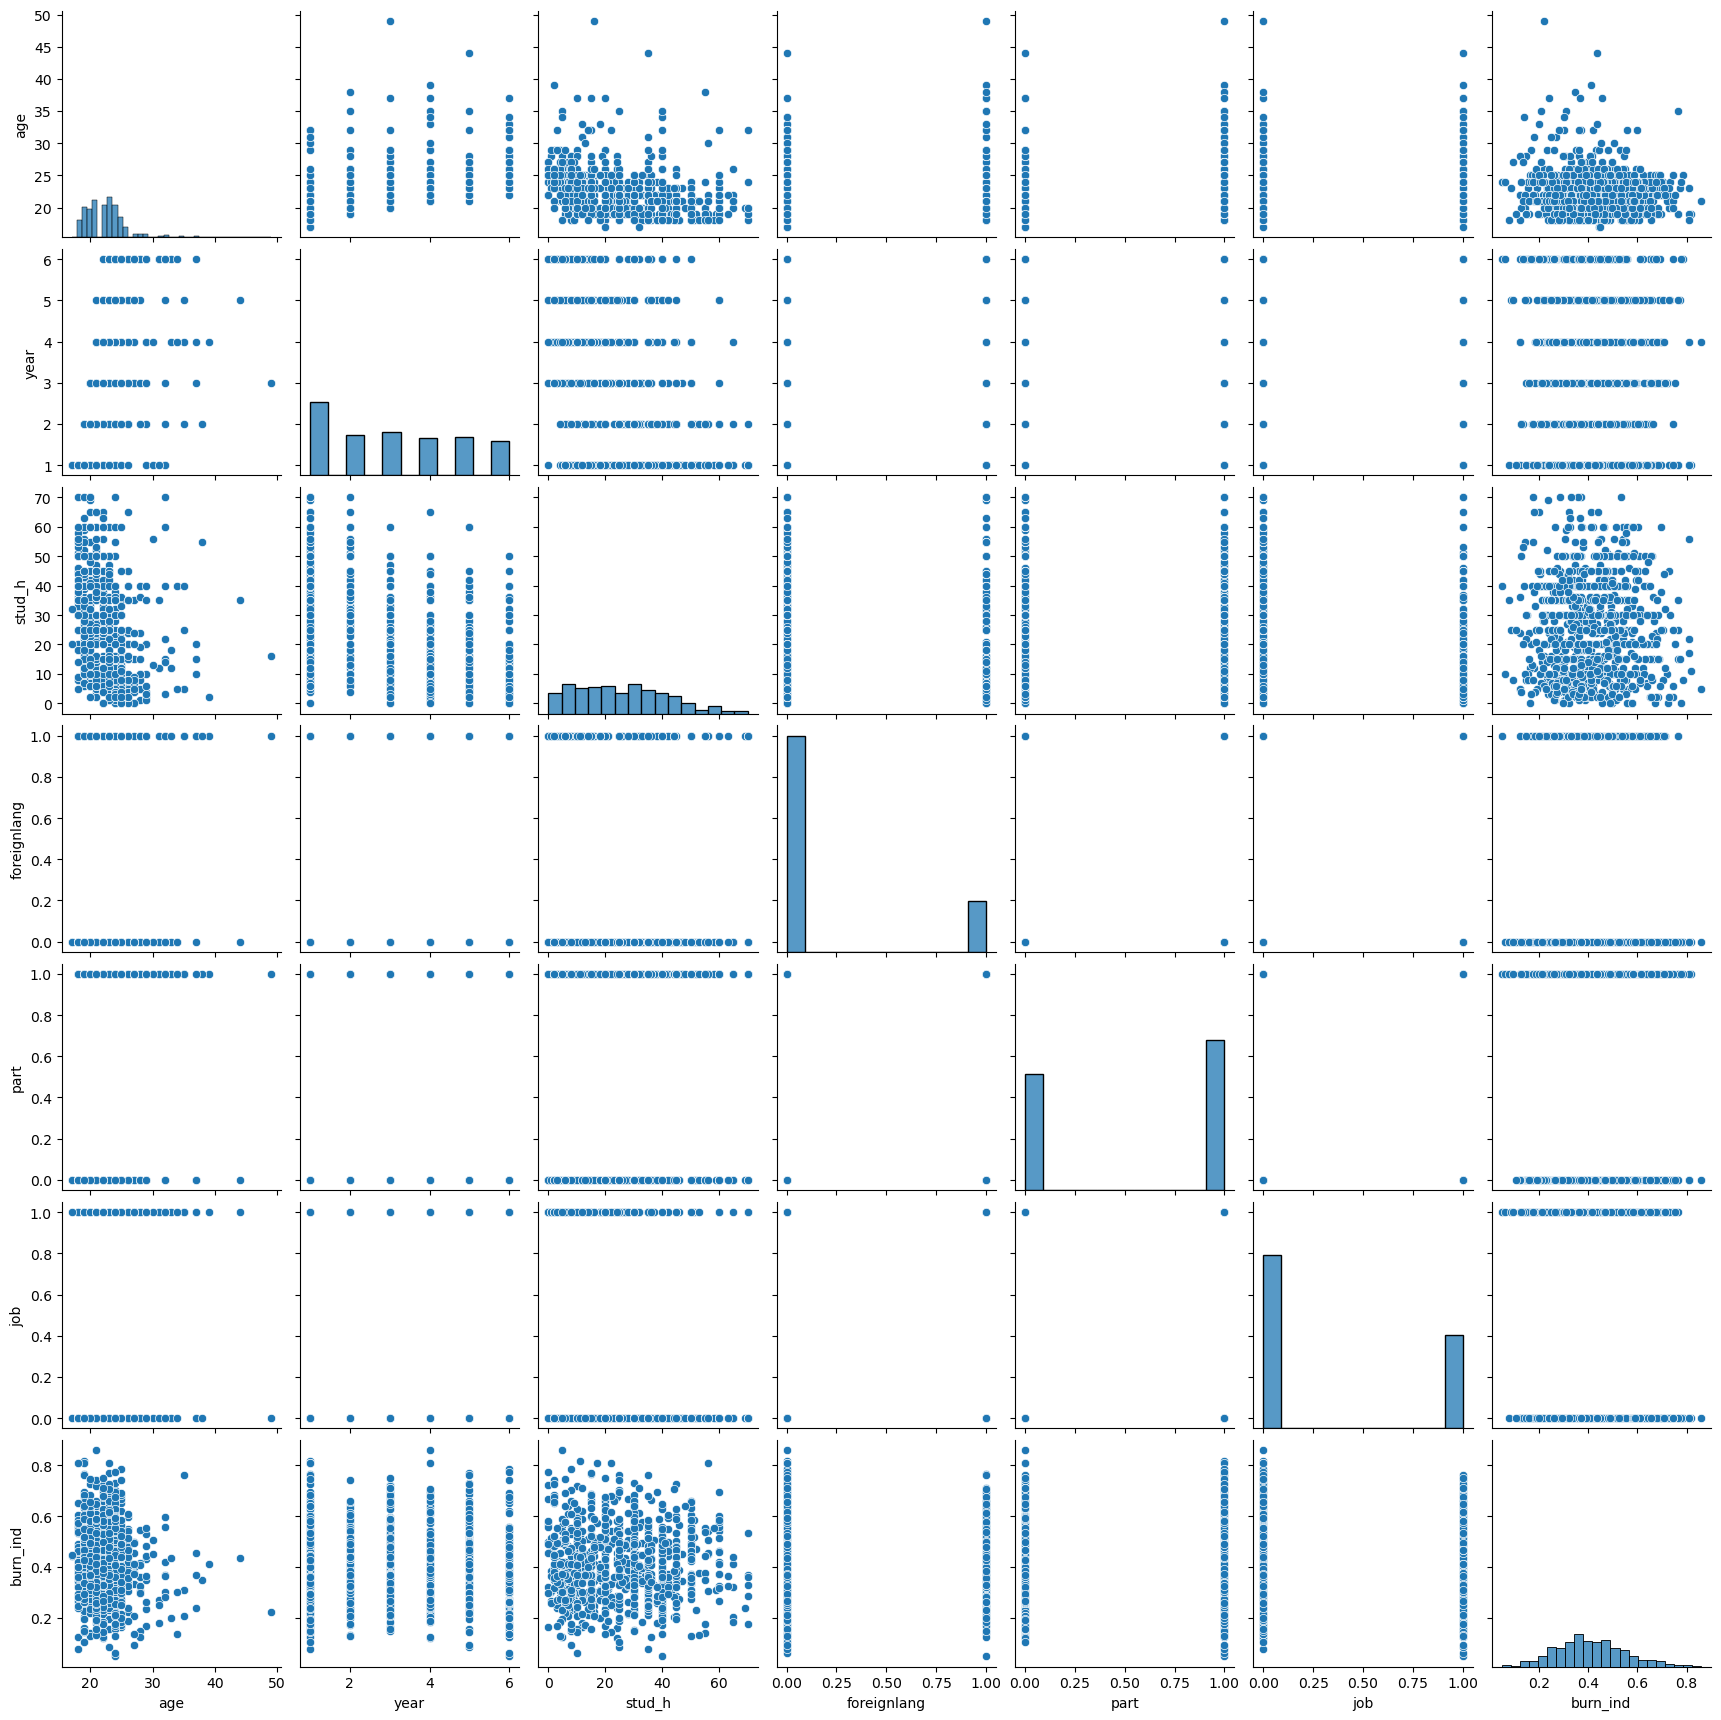

In [20]:
sns.pairplot(burnout_scaled)
plt.show()

# Models

## Overall Mental Health Symptom Prevalence

### Overall Mental Health - Linear Regression

In [21]:
# Generate Regression Model
dummy_vars = pd.get_dummies(mh_ov_scaled['sex'], prefix='sex')
mh_ov_scaled_model = pd.concat([mh_ov_scaled, dummy_vars], axis=1)
mh_ov_scaled_model = mh_ov_scaled_model.drop(['sex'], axis=1)

dummy_vars_un = pd.get_dummies(mh_ov_unscaled['sex'], prefix='sex')
mh_ov_unscaled_model = pd.concat([mh_ov_unscaled, dummy_vars_un], axis=1)
mh_ov_unscaled_model = mh_ov_unscaled_model.drop(['sex'], axis=1)

X = mh_ov_scaled_model.drop(['ov_mhs_preval'], axis=1)
Xorig = X
y = mh_ov_scaled_model['ov_mhs_preval']

scaler = StandardScaler()
X = scaler.fit_transform(X)

Xconst = sm.add_constant(X)
model_omvhs = sm.OLS(y, Xconst).fit()

xnames = ['Intercept', 'age', 'year', 'part', 'job', 'stud_h', 'psyt', 'foreignlang', 'sex_Man', 'sex_Non-binary', 'sex_Woman']
model_omvhs.summary(xname=xnames)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ov_mhs_preval   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     11.41
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           5.04e-17
Time:                        17:19:07   Log-Likelihood:                -547.09
No. Observations:                 886   AIC:                             1114.
Df Residuals:                     876   BIC:                             1162.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6364      0.015     41.979      0.000       0.607       0.666
age               -0.0029      0.019     -0.147      0.883      -0.041       0.035
year              -0.0918      0.021     -4.321      0.000      -0.133      -0.050
part              -0.0397      0.016     -2.543      0.011      -0.070      -0.009
job               -0.0079      0.016     -0.503      0.615      -0.039       0.023
stud_h             0.0041      0.018      0.231      0.817      -0.031       0.039
psyt               0.0994      0.015      6.445      0.000       0.069       0.130
foreignlang        0.0423      0.015      2.735      0.006       0.012       0.073
sex_Man            0.0059      0.008      0.749      0.454      -0.010       0.021
sex_Non-binary    -0.0071      0.015     -0.472      0.637      -0.037       0.023
sex_Woman         -0.0047      0.008     -0.607      0.544      -0.020       0.011
==============================================================================
Omnibus:                        3.037   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                2.930
Skew:                           0.105   Prob(JB):                        0.231
Kurtosis:                       3.188   Cond. No.                     4.47e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.81e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Splitting

In [22]:

X = mh_ov_unscaled_model.drop(['ov_mhs_preval'], axis=1)
Xorig = X
y = mh_ov_unscaled_model['ov_mhs_preval'].apply(lambda x: 1 if x > 0.50 else 0)
print(X)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the data using SMOTE
X_SMOTE, y_SMOTE = smote.fit_resample(X, y)

# Bootstrap the samples
X_resampled, y_resampled = resample(X_SMOTE, y_SMOTE, replace=True, n_samples=len(X), random_state=42)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

      age  year  part  job  stud_h  psyt  foreignlang  sex_Man  \
id                                                               
2      18     1     1    0      56     0            1        1   
4      26     4     1    0      20     0            0        1   
9      21     3     0    0      36     0            0        0   
10     21     2     0    1      51     0            0        0   
13     21     3     1    0      22     0            0        1   
...   ...   ...   ...  ...     ...   ...          ...      ...   
1781   21     2     1    0      45     0            0        1   
1785   20     2     0    0      13     0            0        0   
1787   19     1     0    0      50     0            0        1   
1789   24     5     0    0      20     1            0        0   
1790   22     3     0    1      20     0            0        1   

      sex_Non-binary  sex_Woman  
id                               
2                  0          0  
4                  0          0  
9    

### Overall Mental Health - Logistic Regression

In [23]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [24]:
# Compute various performance metrics on the test data
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

coef_names = [ 'age', 'year', 'part', 'job', 'stud_h', 'psyt', 'foreignlang', 'sex_Man', 'sex_Non-binary', 'sex_Woman']
coef_values = logreg.coef_.flatten()
coef_summary = list(zip(coef_names, coef_values))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Coefficient summary:")
for name, value in coef_summary:
    print(name, ":", value)
    
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.6123595505617978
Precision: 0.6470588235294118
Recall: 0.5851063829787234
F1-score: 0.6145251396648045
Coefficient summary:
age : 0.052540623615196395
year : -0.18215763894997672
part : -0.026031709739531214
job : 0.08771790518656292
stud_h : 0.025537936674024483
psyt : 1.340122735633607
foreignlang : 0.41554759822661225
sex_Man : 2.2298730486648255
sex_Non-binary : 1.0176296681316104
sex_Woman : 1.7894274386558955
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        84
           1       0.65      0.59      0.61        94

    accuracy                           0.61       178
   macro avg       0.61      0.61      0.61       178
weighted avg       0.62      0.61      0.61       178



In [25]:
(logreg.predict_proba([['21', '3', '1', '0', '15', '0', '1', '0', '1', '0']])*(100)).round(5)

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([[75.51548, 24.48452]])

In [26]:
(logreg.predict_proba([['25', '2', '0', '1', '30', '0', '1', '1', '0', '0']])*(100)).round(5)

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([[27.3868, 72.6132]])

### Overall Mental Health - Decision Tree

In [27]:
clf = DecisionTreeClassifier(min_samples_split=20) # Test different values

clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

n_leaves = clf.tree_.n_leaves

print(f"The decision tree has {n_leaves} terminal nodes.")

tree_text = export_text(clf, feature_names=list(Xorig.columns))

print(tree_text)

Accuracy: 0.7980225988700564
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       360
           1       0.83      0.75      0.78       348

    accuracy                           0.80       708
   macro avg       0.80      0.80      0.80       708
weighted avg       0.80      0.80      0.80       708

The decision tree has 60 terminal nodes.
|--- stud_h <= 25.50
|   |--- psyt <= 0.50
|   |   |--- age <= 29.50
|   |   |   |--- stud_h <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- stud_h >  2.50
|   |   |   |   |--- year <= 3.50
|   |   |   |   |   |--- foreignlang <= 0.50
|   |   |   |   |   |   |--- sex_Man <= 0.50
|   |   |   |   |   |   |   |--- stud_h <= 11.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- stud_h >  11.50
|   |   |   |   |   |   |   |   |--- age <= 18.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- age >  18.50
|   |   |   |   |   | 

#### Optimal

In [28]:
scorer = make_scorer(accuracy_score)

params = {'max_depth': range(1, 30)}

grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), params, cv=10, scoring=scorer, n_jobs=4)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

tree_text = export_text(best_model, feature_names=list(Xorig.columns))

print(tree_text)

Best parameters: {'max_depth': 13}
Accuracy: 0.8033707865168539
              precision    recall  f1-score   support

           0       0.76      0.86      0.80        84
           1       0.86      0.76      0.80        94

    accuracy                           0.80       178
   macro avg       0.81      0.81      0.80       178
weighted avg       0.81      0.80      0.80       178

|--- stud_h <= 25.50
|   |--- psyt <= 0.50
|   |   |--- age <= 29.50
|   |   |   |--- stud_h <= 2.50
|   |   |   |   |--- job <= 0.50
|   |   |   |   |   |--- year <= 5.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- year >  5.50
|   |   |   |   |   |   |--- age <= 27.00
|   |   |   |   |   |   |   |--- stud_h <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- stud_h >  1.50
|   |   |   |   |   |   |   |   |--- part <= 0.50
|   |   |   |   |   |   |   |   |   |--- age <= 25.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |  

### Overall Mental Health - SVM Model

In [29]:
# Find best hyperparameters
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']}

svm_clf = svm.SVC()

# Perform grid search using 5-fold cross validation
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [30]:
# Evaluate the performance of the SVM Model
clf = svm.SVC(kernel='rbf', C=100, gamma=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.8314606741573034
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        84
           1       0.86      0.82      0.84        94

    accuracy                           0.83       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.83      0.83      0.83       178



In [31]:
params = clf.get_params()
for param in sorted(params.keys()):
    print("%s: %s" % (param, params[param]))

C: 100
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: 0.1
kernel: rbf
max_iter: -1
probability: False
random_state: None
shrinking: True
tol: 0.001
verbose: False


## Empathy Indicator

### Empathy - Linear Regression

In [32]:
# Generate Regression Model
dummy_vars = pd.get_dummies(empathy_scaled['sex'], prefix='sex')
empathy_scaled_model = pd.concat([empathy_scaled, dummy_vars], axis=1)
empathy_scaled_model = empathy_scaled_model.drop(['sex'], axis=1)
dummy_vars_un = pd.get_dummies(empathy_unscaled['sex'], prefix='sex')
empathy_unscaled_model = pd.concat([empathy_unscaled, dummy_vars_un], axis=1)
empathy_unscaled_model = empathy_unscaled_model.drop(['sex'], axis=1)

X = empathy_scaled_model.drop(['emp_ind'], axis=1)
Xorig = X
xnames = X.columns
y = empathy_scaled_model['emp_ind']

scaler = StandardScaler()
X = scaler.fit_transform(X)

Xconst = sm.add_constant(X)
model_emp = sm.OLS(y, Xconst).fit()
xnames = ['Intercept', 'age', 'year', 'stud_h', 'foreignlang', 'part', 'job', 'sex_Man', 'sex_Non-binary', 'sex_Woman']
model_emp.summary(xname=xnames)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                emp_ind   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     19.92
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           8.61e-28
Time:                        17:21:09   Log-Likelihood:                 757.69
No. Observations:                 886   AIC:                            -1497.
Df Residuals:                     877   BIC:                            -1454.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5738      0.003    165.144      0.000       0.567       0.581
age               -0.0036      0.004     -0.800      0.424      -0.012       0.005
year               0.0178      0.005      3.653      0.000       0.008       0.027
stud_h             0.0032      0.004      0.786      0.432      -0.005       0.011
foreignlang       -0.0126      0.004     -3.567      0.000      -0.020      -0.006
part               0.0018      0.004      0.503      0.615      -0.005       0.009
job               -0.0012      0.004     -0.334      0.738      -0.008       0.006
sex_Man           -0.0204      0.002    -11.441      0.000      -0.024      -0.017
sex_Non-binary     0.0072      0.003      2.076      0.038       0.000       0.014
sex_Woman          0.0192      0.002     10.867      0.000       0.016       0.023
==============================================================================
Omnibus:                        3.299   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.358
Skew:                           0.146   Prob(JB):                        0.187
Kurtosis:                       2.927   Cond. No.                     1.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.45e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Splitting

In [33]:
X = empathy_unscaled_model.drop(['emp_ind'], axis=1)
Xorig = X
y = empathy_unscaled_model['emp_ind'].apply(lambda x: 1 if x > 0.50 else 0)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the data using SMOTE
X_SMOTE, y_SMOTE = smote.fit_resample(X, y)

# Bootstrap the samples
X_resampled, y_resampled = resample(X_SMOTE, y_SMOTE, replace=True, n_samples=len(X), random_state=42)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Empathy - Logistic Regression

In [34]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [35]:
# Compute various performance metrics on the test data
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

coef_names = ['age', 'year', 'stud_h', 'foreignlang', 'part', 'job', 'sex_Man', 'sex_Non-binary', 'sex_Woman']
coef_values = logreg.coef_.flatten()
coef_summary = list(zip(coef_names, coef_values))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Coefficient summary:")
for name, value in coef_summary:
    print(name, ":", value)

Accuracy: 0.7808988764044944
Precision: 0.7473684210526316
Recall: 0.8255813953488372
F1-score: 0.7845303867403315
Coefficient summary:
age : -0.0610902221687773
year : 0.3460577000292258
stud_h : 0.018150976814688878
foreignlang : 0.3623696240291945
part : 0.7573655960184604
job : 0.3675862597274941
sex_Man : 1.5814328922973937
sex_Non-binary : 1.530364398449996
sex_Woman : 3.3157515365601204


In [36]:
(logreg.predict_proba([['26', '1', '25', '0','1', '1', '0', '0', '1']])*(100)).round(5)

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([[34.87807, 65.12193]])

### Empathy - Decision Tree

In [37]:
clf = DecisionTreeClassifier(min_samples_split=20) # Test different values

clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

n_leaves = clf.tree_.n_leaves

print(f"The decision tree has {n_leaves} terminal nodes.")

tree_text = export_text(clf, feature_names=list(Xorig.columns))

print(tree_text)

Accuracy: 0.884180790960452
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       355
           1       0.88      0.88      0.88       353

    accuracy                           0.88       708
   macro avg       0.88      0.88      0.88       708
weighted avg       0.88      0.88      0.88       708

The decision tree has 58 terminal nodes.
|--- sex_Woman <= 0.50
|   |--- sex_Man <= 0.50
|   |   |--- sex_Non-binary <= 0.50
|   |   |   |--- class: 0
|   |   |--- sex_Non-binary >  0.50
|   |   |   |--- class: 1
|   |--- sex_Man >  0.50
|   |   |--- stud_h <= 59.50
|   |   |   |--- job <= 0.50
|   |   |   |   |--- year <= 2.50
|   |   |   |   |   |--- stud_h <= 30.50
|   |   |   |   |   |   |--- stud_h <= 29.00
|   |   |   |   |   |   |   |--- stud_h <= 22.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- stud_h >  22.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- stud_h >  

#### Optimal

In [38]:
scorer = make_scorer(accuracy_score)

params = {'max_depth': range(1, 30)}

grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), params, cv=10, scoring=scorer, n_jobs=4)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

tree_text = export_text(best_model, feature_names=list(Xorig.columns))

print(tree_text)

Best parameters: {'max_depth': 21}
Accuracy: 0.9213483146067416
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        92
           1       0.90      0.94      0.92        86

    accuracy                           0.92       178
   macro avg       0.92      0.92      0.92       178
weighted avg       0.92      0.92      0.92       178

|--- sex_Woman <= 0.50
|   |--- sex_Man <= 0.50
|   |   |--- sex_Non-binary <= 0.50
|   |   |   |--- class: 0
|   |   |--- sex_Non-binary >  0.50
|   |   |   |--- class: 1
|   |--- sex_Man >  0.50
|   |   |--- stud_h <= 59.50
|   |   |   |--- job <= 0.50
|   |   |   |   |--- year <= 2.50
|   |   |   |   |   |--- stud_h <= 30.50
|   |   |   |   |   |   |--- stud_h <= 29.00
|   |   |   |   |   |   |   |--- stud_h <= 22.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- stud_h >  22.00
|   |   |   |   |   |   |   |   |--- part <= 0.50
|   |   |   |   |   |   |   |   |   |---

### Empathy - SVM Model

In [39]:
# Find best hyperparameters
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']}

svm_clf = svm.SVC()

# Perform grid search using 5-fold cross validation
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [40]:
# Evaluate the performance of the SVM Model
clf = svm.SVC(kernel='rbf', C=100, gamma=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9269662921348315
              precision    recall  f1-score   support

           0       0.93      0.92      0.93        92
           1       0.92      0.93      0.92        86

    accuracy                           0.93       178
   macro avg       0.93      0.93      0.93       178
weighted avg       0.93      0.93      0.93       178



In [41]:
params = clf.get_params()
for param in sorted(params.keys()):
    print("%s: %s" % (param, params[param]))

C: 100
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: 0.1
kernel: rbf
max_iter: -1
probability: False
random_state: None
shrinking: True
tol: 0.001
verbose: False


## Mental Health Distress Indicator

### Mental Health Distress - Regression Model

In [42]:
# Generate Regression Model
dummy_vars = pd.get_dummies(mental_health_scaled['sex'], prefix='sex')
mental_health_scaled_model = pd.concat([mental_health_scaled, dummy_vars], axis=1)
mental_health_scaled_model = mental_health_scaled_model.drop(['sex'], axis=1)

dummy_vars_un = pd.get_dummies(mental_health_unscaled['sex'], prefix='sex')
mental_health_unscaled_model = pd.concat([mental_health_unscaled, dummy_vars_un], axis=1)
mental_health_unscaled_model = mental_health_unscaled_model.drop(['sex'], axis=1)

X = mental_health_scaled_model.drop(['mh_ind'], axis=1)
xnames = X.columns
Xorig = X
y = mental_health_scaled_model['mh_ind']
scaler = StandardScaler()
X = scaler.fit_transform(X)

Xconst = sm.add_constant(X)
model_emp = sm.OLS(y, Xconst).fit()
xnames = ['Intercept', 'age', 'year', 'stud_h', 'psyt', 'foreignlang', 'part', 'job', 'health', 'sex_Man', 'sex_Non-binary', 'sex_Woman']
model_emp.summary(xname=xnames)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mh_ind   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     34.80
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           2.54e-57
Time:                        17:21:57   Log-Likelihood:                 352.62
No. Observations:                 886   AIC:                            -683.2
Df Residuals:                     875   BIC:                            -630.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3620      0.005     65.892      0.000       0.351       0.373
age               -0.0022      0.007     -0.304      0.761      -0.016       0.012
year              -0.0210      0.008     -2.718      0.007      -0.036      -0.006
stud_h             0.0155      0.007      2.380      0.018       0.003       0.028
psyt               0.0463      0.006      8.215      0.000       0.035       0.057
foreignlang        0.0136      0.006      2.421      0.016       0.003       0.025
part              -0.0101      0.006     -1.774      0.076      -0.021       0.001
job               -0.0088      0.006     -1.537      0.125      -0.020       0.002
health            -0.0561      0.006     -9.955      0.000      -0.067      -0.045
sex_Man           -0.0190      0.003     -6.609      0.000      -0.025      -0.013
sex_Non-binary    -0.0040      0.005     -0.724      0.469      -0.015       0.007
sex_Woman          0.0195      0.003      6.886      0.000       0.014       0.025
==============================================================================
Omnibus:                        2.943   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.799
Skew:                           0.130   Prob(JB):                        0.247
Kurtosis:                       3.089   Cond. No.                     9.54e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.16e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Splitting

In [43]:
X = mental_health_unscaled_model.drop(['mh_ind'], axis=1)
Xorig = X
y = mental_health_unscaled_model['mh_ind'].apply(lambda x: 1 if x > 0.50 else 0)


# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the data using SMOTE
X_SMOTE, y_SMOTE = smote.fit_resample(X, y)

# Bootstrap the samples
X_resampled, y_resampled = resample(X_SMOTE, y_SMOTE, replace=True, n_samples=len(X), random_state=42)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Mental Health Distress - Logistic Regression

In [44]:
# Generate Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [45]:
# Compute various performance metrics on the test data
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

coef_names = ['age', 'year', 'stud_h', 'psyt', 'foreignlang', 'part', 'job', 'health', 'sex_Man', 'sex_Non-binary', 'sex_Woman']
coef_values = logreg.coef_.flatten()
coef_summary = list(zip(coef_names, coef_values))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Coefficient summary:")
for name, value in coef_summary:
    print(name, ":", value)

Accuracy: 0.7415730337078652
Precision: 0.75
Recall: 0.6976744186046512
F1-score: 0.7228915662650603
Coefficient summary:
age : -0.00975821829735036
year : -0.16714969089841794
stud_h : -0.0023646225781372805
psyt : 0.41773688396936304
foreignlang : -0.3716607687103845
part : -0.7131640323133914
job : -0.8106859757323814
health : -0.8110263864730923
sex_Man : -3.113139360256602
sex_Non-binary : -1.3846822151698122
sex_Woman : -1.7489527518939434


In [46]:
(logreg.predict_proba([['26', '4', '25', '0', '0', '0', '1', '5', '0', '0','1']])*(100)).round(5)

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([[81.89946, 18.10054]])

### Mental Health Distress - Decision Tree

In [47]:
clf = DecisionTreeClassifier(min_samples_split=20) # Test different values

clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

n_leaves = clf.tree_.n_leaves

print(f"The decision tree has {n_leaves} terminal nodes.")

tree_text = export_text(clf, feature_names=list(Xorig.columns))

print(tree_text)

Accuracy: 0.8757062146892656
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       340
           1       0.87      0.90      0.88       368

    accuracy                           0.88       708
   macro avg       0.88      0.87      0.88       708
weighted avg       0.88      0.88      0.88       708

The decision tree has 61 terminal nodes.
|--- health <= 3.50
|   |--- sex_Man <= 0.50
|   |   |--- age <= 25.50
|   |   |   |--- job <= 0.50
|   |   |   |   |--- stud_h <= 64.50
|   |   |   |   |   |--- sex_Non-binary <= 0.50
|   |   |   |   |   |   |--- year <= 1.50
|   |   |   |   |   |   |   |--- foreignlang <= 0.50
|   |   |   |   |   |   |   |   |--- stud_h <= 26.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- stud_h >  26.50
|   |   |   |   |   |   |   |   |   |--- stud_h <= 32.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- stud_h >  32.50

#### Optimal

In [48]:
scorer = make_scorer(accuracy_score)

params = {'max_depth': range(1, 30)}

grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), params, cv=10, scoring=scorer, n_jobs=4)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

tree_text = export_text(best_model, feature_names=list(Xorig.columns))

print(tree_text)

Best parameters: {'max_depth': 15}
Accuracy: 0.8539325842696629
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        92
           1       0.85      0.85      0.85        86

    accuracy                           0.85       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.85      0.85      0.85       178

|--- health <= 3.50
|   |--- sex_Man <= 0.50
|   |   |--- age <= 25.50
|   |   |   |--- job <= 0.50
|   |   |   |   |--- sex_Non-binary <= 0.50
|   |   |   |   |   |--- stud_h <= 64.50
|   |   |   |   |   |   |--- year <= 1.50
|   |   |   |   |   |   |   |--- foreignlang <= 0.50
|   |   |   |   |   |   |   |   |--- stud_h <= 26.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- stud_h >  26.50
|   |   |   |   |   |   |   |   |   |--- stud_h <= 32.50
|   |   |   |   |   |   |   |   |   |   |--- part <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

### Mental Health Distress - SVM Model

In [49]:
# Find best hyperparameters
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']}

svm_clf = svm.SVC()

# Perform grid search using 5-fold cross validation
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [50]:
# Evaluate the performance of the SVM Model
clf = svm.SVC(kernel='rbf', C=100, gamma=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.8146067415730337
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        92
           1       0.81      0.80      0.81        86

    accuracy                           0.81       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.81      0.81      0.81       178



In [51]:
params = clf.get_params()
for param in sorted(params.keys()):
    print("%s: %s" % (param, params[param]))

C: 100
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: 0.1
kernel: rbf
max_iter: -1
probability: False
random_state: None
shrinking: True
tol: 0.001
verbose: False


## Burnout Indicator

### Burnout - Linear Regression

In [52]:
# Generate Regression Model
dummy_vars = pd.get_dummies(burnout_scaled['sex'], prefix='sex')
burnout_scaled_model = pd.concat([burnout_scaled, dummy_vars], axis=1)
burnout_scaled_model = burnout_scaled_model.drop(['sex'], axis=1)

dummy_vars_un = pd.get_dummies(burnout_unscaled['sex'], prefix='sex')
burnout_unscaled_model = pd.concat([burnout_unscaled, dummy_vars_un], axis=1)
burnout_unscaled_model = burnout_unscaled_model.drop(['sex'], axis=1)

X = burnout_scaled_model.drop(['burn_ind'], axis=1)
xnames = X.columns
Xorig = X
y = burnout_scaled_model['burn_ind']
scaler = StandardScaler()
X = scaler.fit_transform(X)

Xconst = sm.add_constant(X)
model_emp = sm.OLS(y, Xconst).fit()
xnames = ['Intercept', 'age', 'year', 'stud_h', 'foreignlang', 'part', 'job', 'sex_Man', 'sex_Non-binary', 'sex_Woman']
model_emp.summary(xname=xnames)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               burn_ind   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.540
Date:                Wed, 19 Apr 2023   Prob (F-statistic):            0.00976
Time:                        17:26:29   Log-Likelihood:                 499.68
No. Observations:                 886   AIC:                            -981.4
Df Residuals:                     877   BIC:                            -938.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4103      0.005     88.263      0.000       0.401       0.419
age               -0.0101      0.006     -1.691      0.091      -0.022       0.002
year              -0.0015      0.007     -0.236      0.813      -0.014       0.011
stud_h            -0.0042      0.006     -0.766      0.444      -0.015       0.007
foreignlang        0.0032      0.005      0.671      0.503      -0.006       0.012
part              -0.0045      0.005     -0.933      0.351      -0.014       0.005
job               -0.0016      0.005     -0.337      0.736      -0.011       0.008
sex_Man           -0.0081      0.002     -3.397      0.001      -0.013      -0.003
sex_Non-binary     0.0043      0.005      0.929      0.353      -0.005       0.013
sex_Woman          0.0074      0.002      3.128      0.002       0.003       0.012
==============================================================================
Omnibus:                       12.497   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.868
Skew:                           0.293   Prob(JB):                      0.00161
Kurtosis:                       2.931   Cond. No.                     1.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.45e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Splitting

In [53]:
X = burnout_unscaled_model.drop(['burn_ind'], axis=1)
Xorig = X
y = burnout_unscaled_model['burn_ind'].apply(lambda x: 1 if x > 0.50 else 0)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the data using SMOTE
X_SMOTE, y_SMOTE = smote.fit_resample(X, y)

# Bootstrap the samples
X_resampled, y_resampled = resample(X_SMOTE, y_SMOTE, replace=True, n_samples=len(X), random_state=42)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Burnout - Logistic Regression

In [54]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [55]:
# Compute various performance metrics on the test data
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

coef_names = ['age', 'year', 'stud_h', 'foreignlang', 'part', 'job', 'sex_Man', 'sex_Non-binary', 'sex_Woman']
coef_values = logreg.coef_.flatten()
coef_summary = list(zip(coef_names, coef_values))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Coefficient summary:")
for name, value in coef_summary:
    print(name, ":", value)

Accuracy: 0.6910112359550562
Precision: 0.6891891891891891
Recall: 0.6144578313253012
F1-score: 0.6496815286624203
Coefficient summary:
age : -0.09645618178939863
year : 0.08837194880934997
stud_h : -0.002525163757227461
foreignlang : -0.9833850274044306
part : -0.8555976918111883
job : -0.3810041866562519
sex_Man : -3.045981169230055
sex_Non-binary : -1.2222956272853072
sex_Woman : -2.1517369060133578


### Burnout - Decision Tree

In [56]:
clf = DecisionTreeClassifier(min_samples_split=20) # Test different values

clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

n_leaves = clf.tree_.n_leaves

print(f"The decision tree has {n_leaves} terminal nodes.")

tree_text = export_text(clf, feature_names=list(Xorig.columns))

print(tree_text)

Accuracy: 0.826271186440678
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       355
           1       0.86      0.78      0.82       353

    accuracy                           0.83       708
   macro avg       0.83      0.83      0.83       708
weighted avg       0.83      0.83      0.83       708

The decision tree has 61 terminal nodes.
|--- part <= 0.50
|   |--- sex_Man <= 0.50
|   |   |--- sex_Woman <= 0.50
|   |   |   |--- sex_Non-binary <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- sex_Non-binary >  0.50
|   |   |   |   |--- class: 0
|   |   |--- sex_Woman >  0.50
|   |   |   |--- age <= 24.50
|   |   |   |   |--- stud_h <= 55.00
|   |   |   |   |   |--- stud_h <= 47.50
|   |   |   |   |   |   |--- age <= 19.50
|   |   |   |   |   |   |   |--- stud_h <= 17.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- stud_h >  17.50
|   |   |   |   |   |   |   |   |--- foreignlang <= 0.50
|   |   

#### Optimal

In [57]:
scorer = make_scorer(accuracy_score)

params = {'max_depth': range(1, 30)}

grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), params, cv=10, scoring=scorer, n_jobs=4)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

tree_text = export_text(best_model, feature_names=list(Xorig.columns))

print(tree_text)

Best parameters: {'max_depth': 21}
Accuracy: 0.8651685393258427
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        95
           1       0.86      0.86      0.86        83

    accuracy                           0.87       178
   macro avg       0.86      0.86      0.86       178
weighted avg       0.87      0.87      0.87       178

|--- part <= 0.50
|   |--- sex_Man <= 0.50
|   |   |--- sex_Woman <= 0.50
|   |   |   |--- sex_Non-binary <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- sex_Non-binary >  0.50
|   |   |   |   |--- class: 0
|   |   |--- sex_Woman >  0.50
|   |   |   |--- age <= 24.50
|   |   |   |   |--- stud_h <= 55.00
|   |   |   |   |   |--- stud_h <= 47.50
|   |   |   |   |   |   |--- age <= 19.50
|   |   |   |   |   |   |   |--- stud_h <= 17.50
|   |   |   |   |   |   |   |   |--- job <= 0.50
|   |   |   |   |   |   |   |   |   |--- foreignlang <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- stud_h <= 

### Burnout - SVM Model

In [58]:
# Find best hyperparameters
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']}

svm_clf = svm.SVC()

# Perform grid search using 5-fold cross validation
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [59]:
# Evaluate the performance of the SVM Model
clf = svm.SVC(kernel='rbf', C=100, gamma=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.8539325842696629
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        95
           1       0.83      0.87      0.85        83

    accuracy                           0.85       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.86      0.85      0.85       178



In [60]:
params = clf.get_params()
for param in sorted(params.keys()):
    print("%s: %s" % (param, params[param]))

C: 100
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: 0.1
kernel: rbf
max_iter: -1
probability: False
random_state: None
shrinking: True
tol: 0.001
verbose: False
